In [144]:
import pandas as pd
% matplotlib inline

In [3]:
import urllib
import time
from bs4 import BeautifulSoup


In [128]:
episodes2 = []  #Had to do a second pass as the connection timed out at one point. Could probably improve this.

for season in range(21, 29):
    url = 'http://www.imdb.com/title/tt0096697/episodes?season=' + str(season)
    f = urllib.urlopen(url)
    html = f.read()
    soup = BeautifulSoup(html)
    print 'Season: ' + str(season)
    for episode in soup.find_all(class_='info'):
        time.sleep(1)
        episode_dict = {}
        episode_dict['episode_number'] = episode.find(itemprop="episodeNumber")['content']
        print '  Episode: ' + str(episode_dict['episode_number'])
        episode_dict['season'] = season
        episode_dict['link'] = 'http://www.imdb.com' + episode.find(itemprop='name')['href']
        episode_dict['title'] = episode.find(itemprop='name').text.strip()
        episode_dict['episode_description'] = episode.find(class_='item_description').text.strip()
        episode_dict['air_date'] = episode.find(class_='airdate').text.strip()
        
        ep_f = urllib.urlopen(episode_dict['link'])
        ep_html = ep_f.read()
        ep_soup = BeautifulSoup(ep_html)
        episode_dict['rating'] = ep_soup.find(class_="imdbRating").find(itemprop="ratingValue").text
        episode_dict['rating_count'] = ep_soup.find(class_="imdbRating").find(itemprop="ratingCount").text
        episode_dict['writers'] = ' '.join([i.text.strip() for i in ep_soup.find_all(itemprop="creator") if i['itemtype'] == 'http://schema.org/Person'])
        episode_dict['director'] = ep_soup.find(itemprop="director").find(itemprop="name").text
        episode_dict['storyline'] = ep_soup.find_all(itemprop="description")[1].text.strip()
        episodes2.append(episode_dict)

Season: 21
  Episode: 1
  Episode: 2
  Episode: 3
  Episode: 4
  Episode: 5
  Episode: 6
  Episode: 7
  Episode: 8
  Episode: 9
  Episode: 10
  Episode: 11
  Episode: 12
  Episode: 13
  Episode: 14
  Episode: 15
  Episode: 16
  Episode: 17
  Episode: 18
  Episode: 19
  Episode: 20
  Episode: 21
  Episode: 22
  Episode: 23
Season: 22
  Episode: 1
  Episode: 2
  Episode: 3
  Episode: 4
  Episode: 5
  Episode: 6
  Episode: 7
  Episode: 8
  Episode: 9
  Episode: 10
  Episode: 11
  Episode: 12
  Episode: 13
  Episode: 14
  Episode: 15
  Episode: 16
  Episode: 17
  Episode: 18
  Episode: 19
  Episode: 20
  Episode: 21
  Episode: 22
Season: 23
  Episode: 1
  Episode: 2
  Episode: 3
  Episode: 4
  Episode: 5
  Episode: 6
  Episode: 7
  Episode: 8
  Episode: 9
  Episode: 10
  Episode: 11
  Episode: 12
  Episode: 13
  Episode: 14
  Episode: 15
  Episode: 16
  Episode: 17
  Episode: 18
  Episode: 19
  Episode: 20
  Episode: 21
  Episode: 22
Season: 24
  Episode: 1
  Episode: 2
  Episode: 3
  Epis

In [129]:
df2 = pd.DataFrame(episodes2)

In [125]:
df = pd.DataFrame(episodes)

In [132]:
df3 = pd.concat([df[df.season < 21], df2])

In [154]:
df3.index = range(len(df3))

In [141]:
df3.to_csv('simpsons_raw.csv', encoding = 'utf-8')

In [139]:
df3['rating'] = df3['rating'].astype('float')

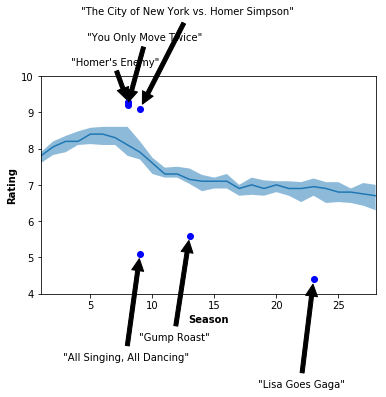

In [237]:
import matplotlib.pyplot as plt

median = df3.groupby('season')['rating'].median()

upper = df3.groupby('season')['rating'].quantile(q=0.75)
lower = df3.groupby('season')['rating'].quantile(q=0.25)

top = df3[['title', 'season', 'rating']].loc[df3['rating'].argsort()][::-1][:3]
bottom = df3[['title', 'season', 'rating']].loc[df3['rating'].argsort()][:3]

median.plot()

axes = plt.gca()
axes.set_ylim([4,10])

plt.fill_between(means.index, lower.values, upper.values, alpha = 0.5)
plt.ylabel('Rating', weight = 'bold')
plt.xlabel('Season', weight = 'bold')

i = 0
for row in bottom.iterrows():
    plt.plot(row[1].season, row[1].rating, 'o', color = 'blue')
    plt.annotate('"'+row[1].title+'"', xy=(row[1].season, row[1].rating), xytext=(row[1].season -1 -(i*2), row[1].rating - 3 + i ),
            arrowprops=dict(facecolor='black', shrink=0.05),
                 horizontalalignment='center'
            )
    i += 0.05
i = 0
for row in top.iterrows():
    plt.plot(row[1].season, row[1].rating, 'o', color = 'blue')
    plt.annotate('"'+row[1].title+'"', xy=(row[1].season, row[1].rating), xytext=(row[1].season -1 +(i*3), row[1].rating + 1 + i),
            arrowprops=dict(facecolor='black', shrink=0.05),
                 horizontalalignment='center'
            )
    i += 0.8

u'Matt Groening (created by), James L. Brooks (developed by)'